# Week 14
## Unsupervised Learning: K-Means clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
df = pd.read_csv('mall_customers-3.csv')  # sep='\t'

In [3]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
df.head(10)

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
#df.info()

In [5]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

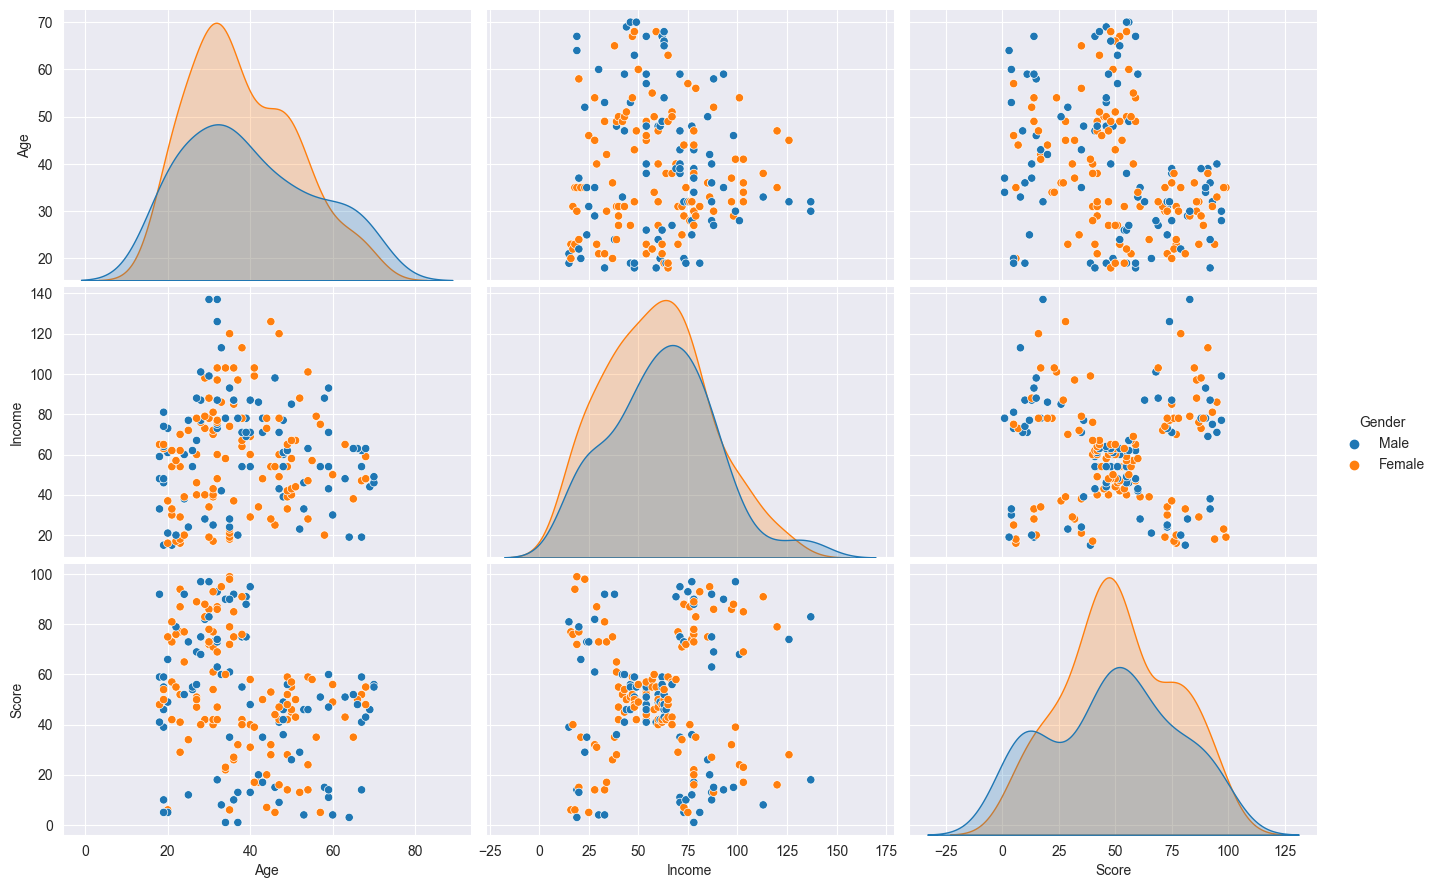

In [6]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', height=3, aspect=1.5)
# plt.show()

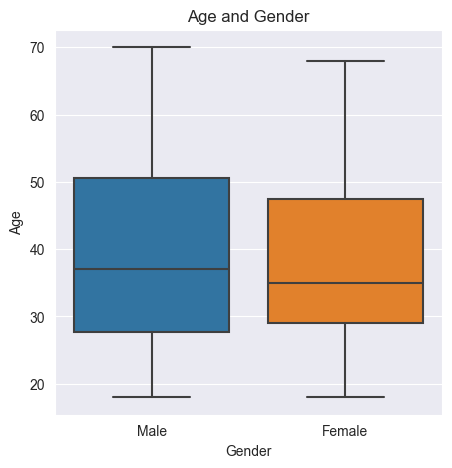

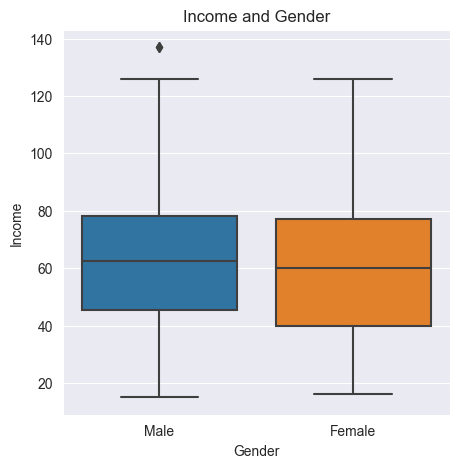

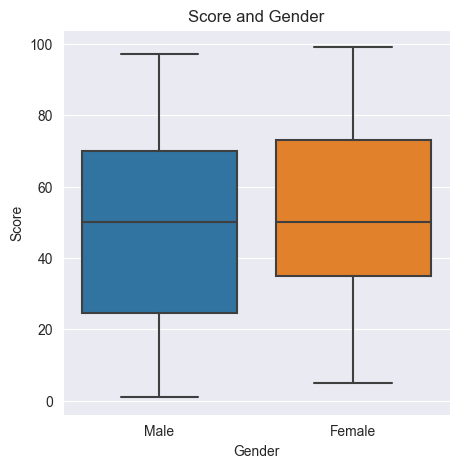

In [7]:
for column in ['Age', 'Income', 'Score']:
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.boxplot(data=df, x='Gender', y=column, ax=ax)
    ax.set_title(f"{column} and Gender")
    plt.show()

In [8]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

k-Means clustering

In [9]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

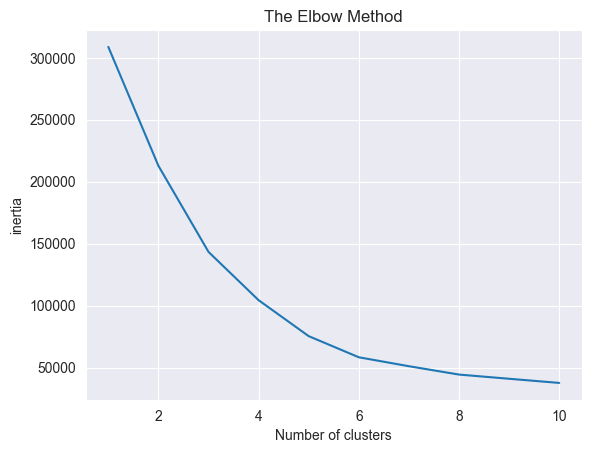

In [10]:
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.show()

In [11]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)
print(y_kmeans)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


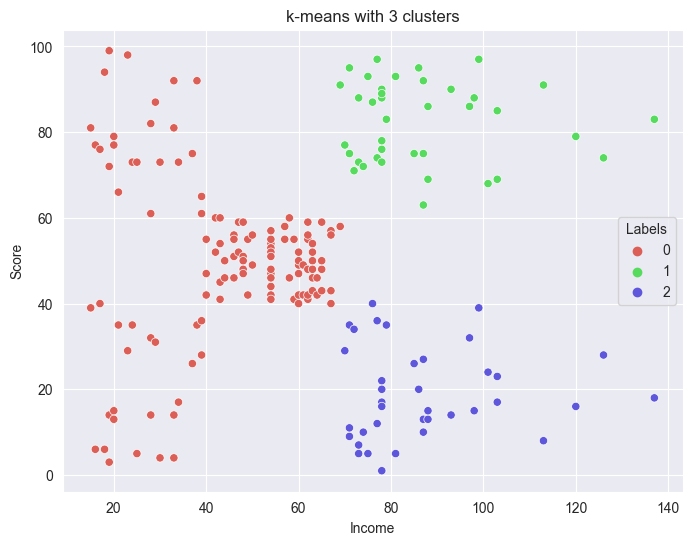

In [12]:
km3 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 3))
plt.title('k-means with 3 clusters')
plt.show()

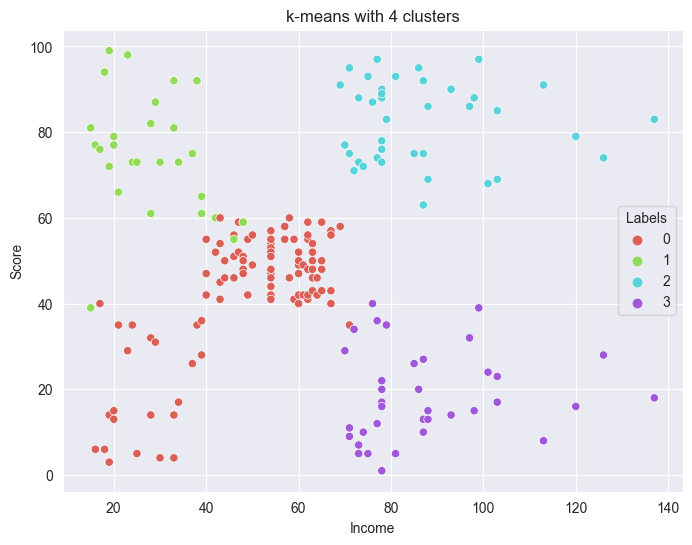

In [13]:
km3 = KMeans(n_clusters=4).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 4))
plt.title('k-means with 4 clusters')
plt.show()

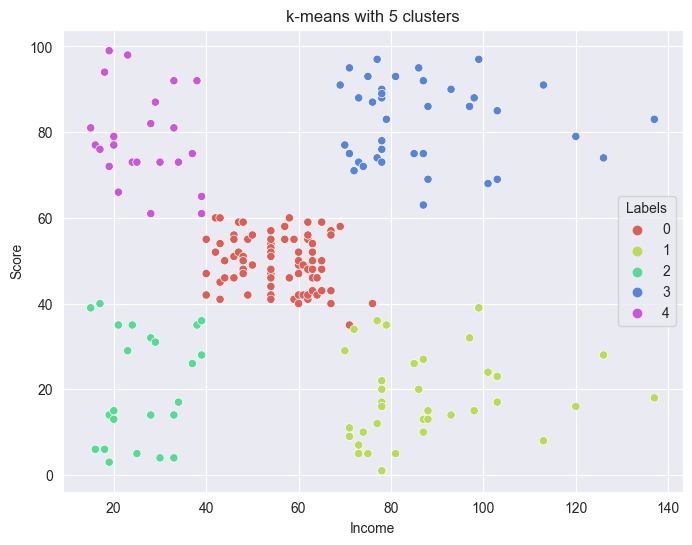

In [14]:
km3 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('k-means with 5 clusters')
plt.show()

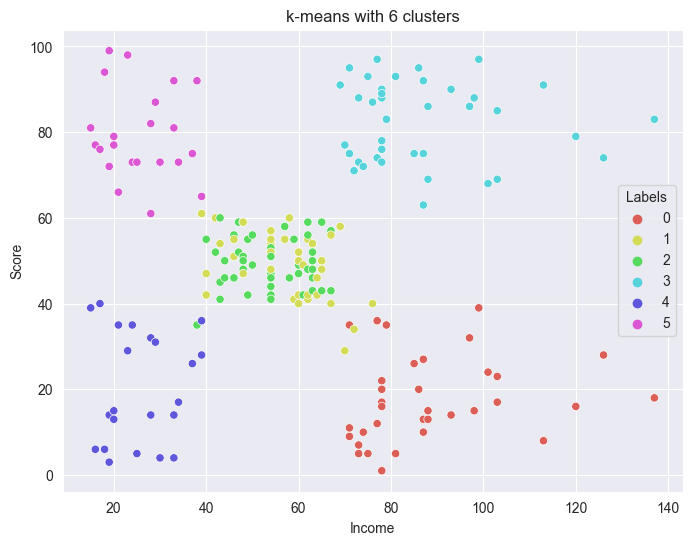

In [15]:
km3 = KMeans(n_clusters=6).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 6))
plt.title('k-means with 6 clusters')
plt.show()

C:\Users\sonja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sonja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sonja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


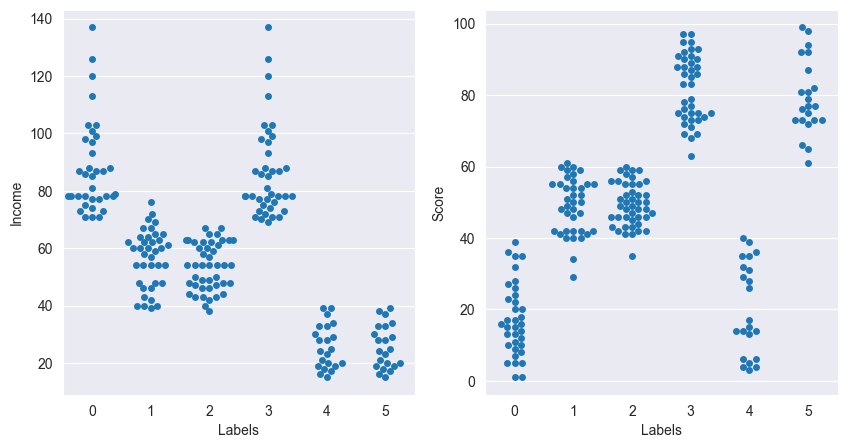

In [16]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)  # or (1,2,1)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
plt.show()

### Remembr IRIS dataset from last week? 
### Let's test it out with our IRIS dataset!

In [17]:
iris = datasets.load_iris()

In [18]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [19]:
data = pd.DataFrame({'sepal length': iris.data[:, 0],
                     'petal length': iris.data[:, 2]})

In [20]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

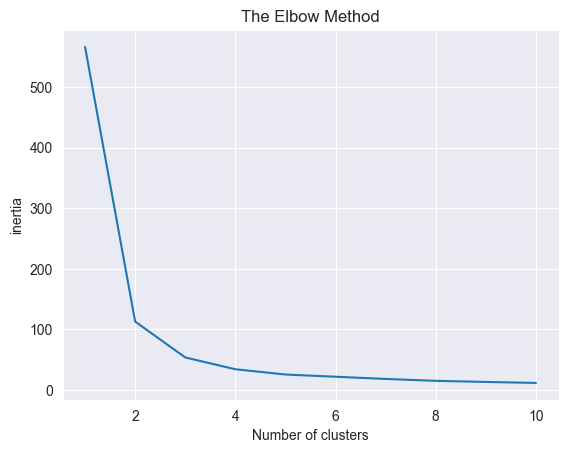

In [21]:
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.show()

# this could be 2 or 3 (just look at both and decide)

In [22]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(data)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 3 1 1 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 2 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 4 2 2 4 3 4 2 4 2
 2 2 1 1 2 2 4 4 1 2 1 4 1 2 4 1 1 2 4 4 4 2 1 2 4 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


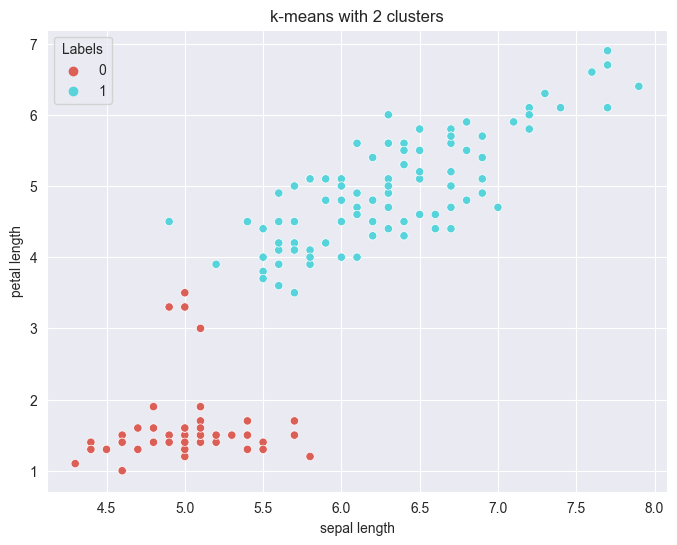

In [23]:
km3 = KMeans(n_clusters=2).fit(data)
data['Labels'] = km3.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['sepal length'], y=data['petal length'], hue=data['Labels'], palette=sns.color_palette('hls', 2))
plt.title('k-means with 2 clusters')
plt.show()

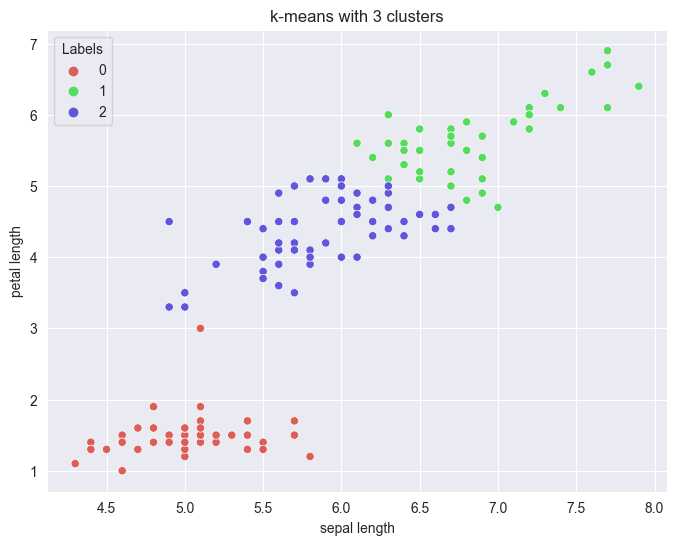

In [24]:
km3 = KMeans(n_clusters=3).fit(data)
data['Labels'] = km3.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['sepal length'], y=data['petal length'], hue=data['Labels'], palette=sns.color_palette('hls', 3))
plt.title('k-means with 3 clusters')
plt.show()